# 集成学习
1. 描述：集成学习是使用一系列学习器进行学习，并使用某种规则把各个学习结果进行整合从而获得比单个学习器更好的学习效果的一种机器学习方法
2. 思想
    - 创建多个不同的子模型，再集成多个子模型的意见
    - 为了创建子模型的差异性，每个子模型可以只看样本数据的一部分
    - 子模型不需要太高的准确率，但多个子模型集成起来效果就很好
3. pasting
    - 不放回取样
4. bagging
    - 放回取样、并行处理
    - OOB（Out-of-Bag）
        - 放回取样平均大约有37%的样本没有被取到
        - 那么可以不进行训练测试分离，直接使用未取到的样本当做验证集与测试集
    - 仅针对特征进行随机采样（Random Subspaces）
    - 对样本、特征一起随机采样（Random Patches）
5. 随机森林
    - bagging
    - Base Estimator：Decision Tree
    - 决策树在节点的划分上，采用在随机的特征子集上寻找最优划分特征
6. Extra-Trees
    - bagging
    - Base Estimator：Decision Tree
    - 决策树在节点的划分上，使用随机的特征和随机的阈值
7. Boosting
    - Ada Boosting
    - Gradient Boosting

# sklearn中的VotingClassifier

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

X, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

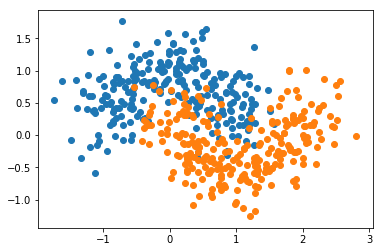

In [3]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

### Hard Voting Classifier（少数服从多数）

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

hard_voting_clf = VotingClassifier(estimators=[
    ('log_clf', LogisticRegression()),
    ('svm_clf', SVC()),
    ('dt_clf', DecisionTreeClassifier(random_state=666))
], voting='hard')

In [8]:
hard_voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('log_clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('svm_clf...       min_weight_fraction_leaf=0.0, presort=False, random_state=666,
            splitter='best'))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [9]:
hard_voting_clf.score(X_test, y_test)

0.89600000000000002

### Soft Voting Classifier（有权值投票）

In [11]:
soft_voting_clf = VotingClassifier(estimators=[
    ('log_clf', LogisticRegression()),
    ('svm_clf', SVC(probability=True)),  #需计算SVM的概率，则需设置对应参数
    ('dt_clf', DecisionTreeClassifier(random_state=666))
], voting='soft')  #设置voting=soft

In [12]:
soft_voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('log_clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('svm_clf...       min_weight_fraction_leaf=0.0, presort=False, random_state=666,
            splitter='best'))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [13]:
soft_voting_clf.score(X_test, y_test)

0.91200000000000003

# bagging

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

X, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=42)

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

#n_estimators设置子模型数量、max_samples设置每次采样的样本数量、
#bootstrap=True表示对样本使用放回采样、oob_score=True表示记录未采样的样本
#n_jobs设置并行处理, max_features设置每次采样特征数量
#bootstrap_features=True表示对特征使用放回采样
bagging_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                               max_samples=100, bootstrap=True, oob_score=True,
                               n_jobs=-1, max_features=1, bootstrap_features=True)
bagging_clf.fit(X, y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=True, max_features=1,
         max_samples=100, n_estimators=500, n_jobs=-1, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [23]:
bagging_clf.oob_score_

0.85399999999999998

In [24]:
%%time
bagging_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=5000,
                               max_samples=100, bootstrap=True, oob_score=True)
bagging_clf.fit(X, y)

Wall time: 6.17 s


In [25]:
%%time
bagging_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=5000,
                               max_samples=100, bootstrap=True, oob_score=True,
                               n_jobs=-1)
bagging_clf.fit(X, y)

Wall time: 5.56 s


# sklearn中的RandomForestClassifier

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

X, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=666)

In [4]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=500, random_state=666,
                                oob_score=True, n_jobs=-1)
rf_clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=True, random_state=666, verbose=0, warm_start=False)

In [5]:
rf_clf.oob_score_

0.89200000000000002

In [7]:
rf_clf2 = RandomForestClassifier(n_estimators=500, random_state=666,
                                oob_score=True, n_jobs=-1, max_leaf_nodes=16)
rf_clf2.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=True, random_state=666, verbose=0, warm_start=False)

In [8]:
rf_clf2.oob_score_

0.90600000000000003

# sklearn中的ExtraTreesClassifier

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

X, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=666)

In [9]:
from sklearn.ensemble import ExtraTreesClassifier

et_clf = RandomForestClassifier(n_estimators=500,bootstrap=True,
                                random_state=666, oob_score=True)
et_clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=True, random_state=666, verbose=0, warm_start=False)

In [10]:
et_clf.oob_score_

0.89200000000000002

# 集成学习解决回归问题

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

# Boosting

### Ada Boosting

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

X, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=666)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

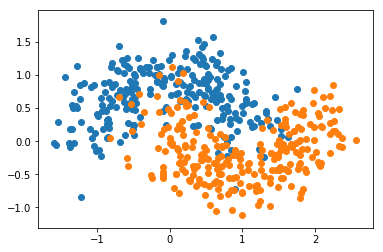

In [5]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [6]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

#传入决策树作为子模型
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=500)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=500, random_state=None)

In [7]:
ada_clf.score(X_test, y_test)

0.86399999999999999

### Gradient Boosting（以决策树为estimator）

In [8]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(max_depth=2, n_estimators=30)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=30,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [10]:
gb_clf.score(X_test, y_test)

0.92800000000000005

### Boosting解决回归问题

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor